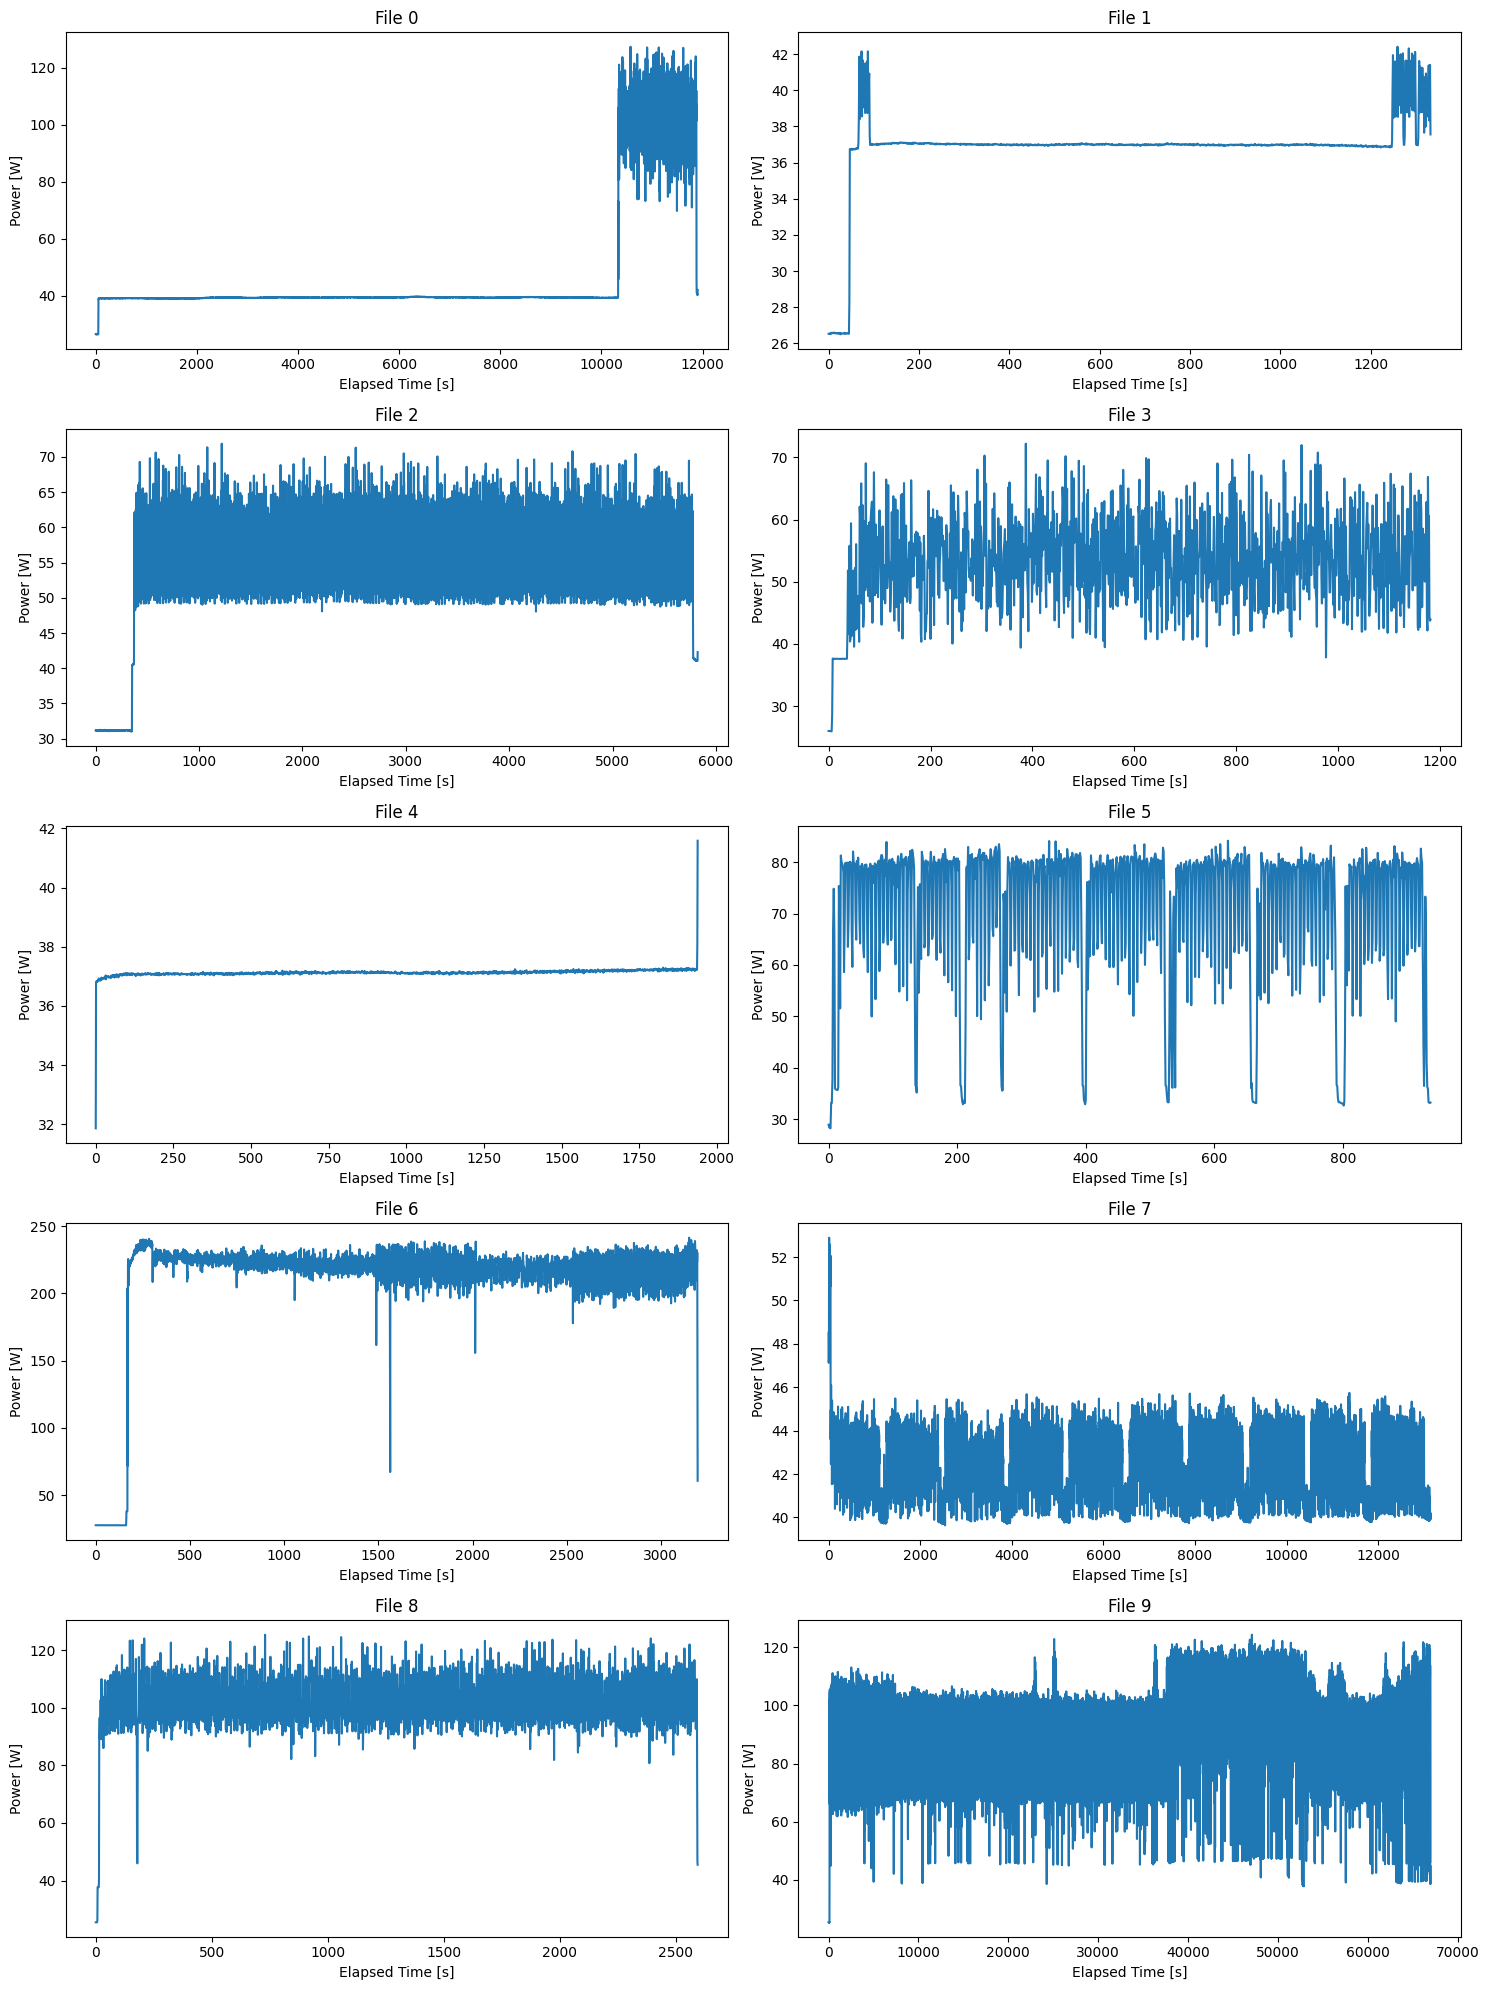

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

plot_data = []

output_dir = '/scratch/cognit/workloads'

for idx in range(20,30):
    file_path = os.path.join(output_dir, f'{idx}.csv')
    df = pd.read_csv(file_path)
    plot_data.append(df)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    ax.plot(df['timestamp'], df['power_draw_W'])
    
    ax.set_title(f'File {idx}')
    ax.set_xlabel('Elapsed Time [s]')
    ax.set_ylabel('Power [W]')
    ax.grid(False)

plt.tight_layout()
plt.show()

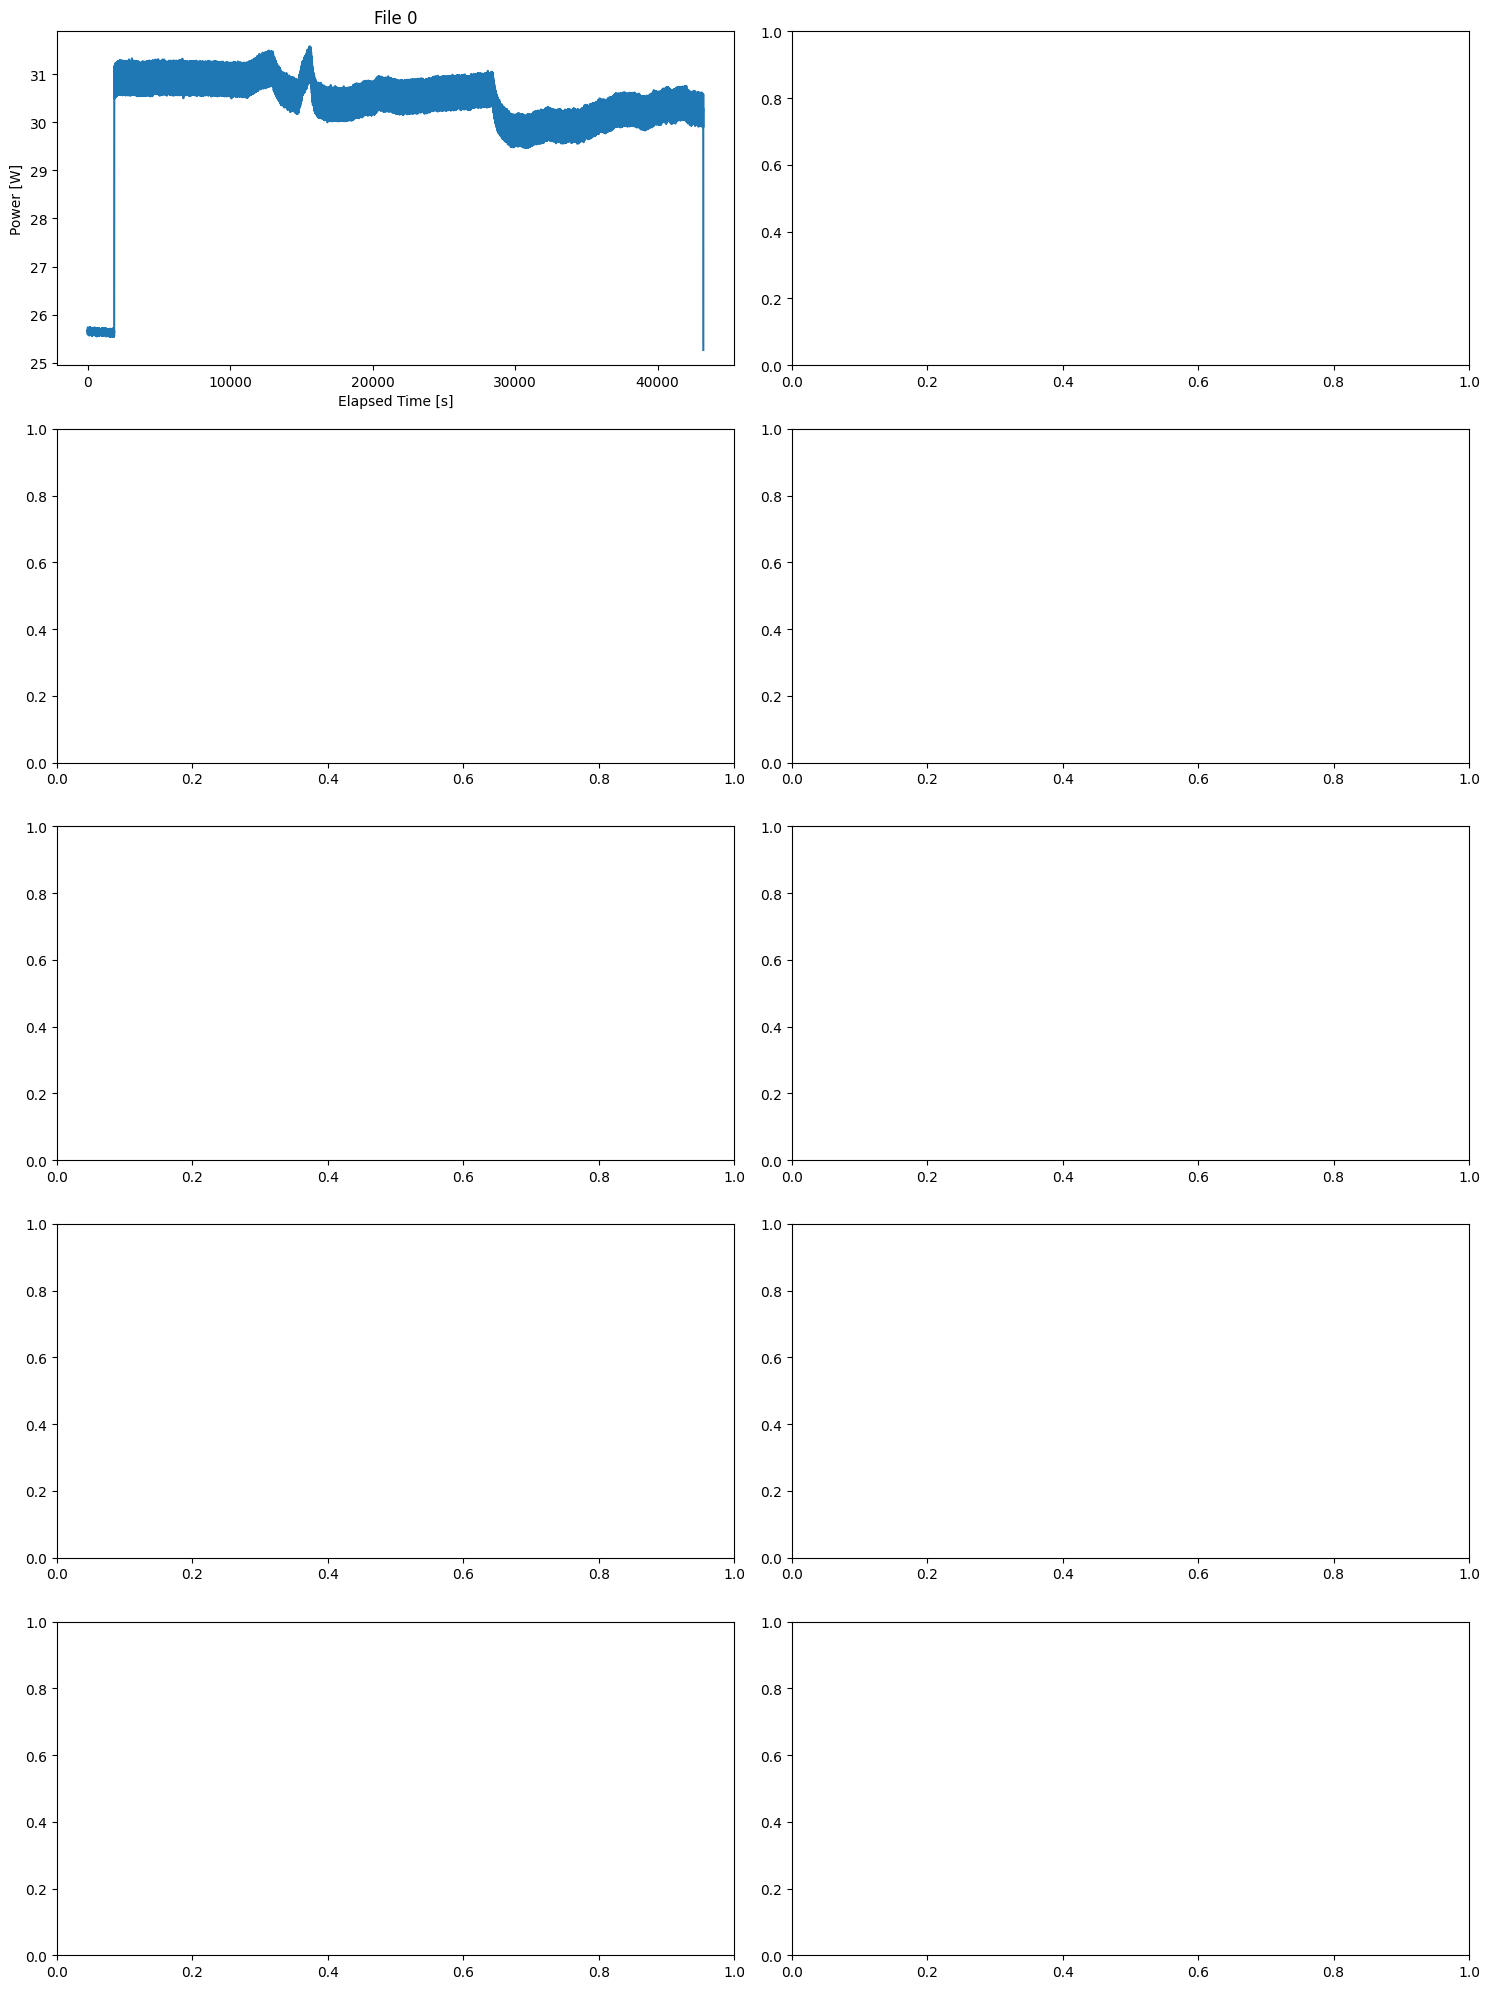

In [9]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

plot_data = []

workload_1 = '/scratch/cognit/filtered_workloads/15.csv'

file_path = os.path.join(output_dir, f'{workload_1}')
df = pd.read_csv(file_path)
plot_data.append(df)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    ax.plot(df['timestamp'], df['power_draw_W'])
    
    ax.set_title(f'File {idx}')
    ax.set_xlabel('Elapsed Time [s]')
    ax.set_ylabel('Power [W]')
    ax.grid(False)

plt.tight_layout()
plt.show()